# **Laptop Price Prediction**

## **Overview:**
Welcome to this notebook where we dive into predicting laptop prices! In the fast-paced world of tech, knowing how much a laptop might cost is super useful. This notebook is all about using clever math to figure out laptop prices based on things like the processor, RAM, storage, and brand.

## **Dataset:**
The dataset used in this notebook is sourced from https://www.kaggle.com/datasets/huzdaria/laptop-pricing/data

![](https://w0.peakpx.com/wallpaper/544/540/HD-wallpaper-macbook-pro-apple-technology.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/laptop-pricing/laptop_pricing_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/laptop-pricing/laptop_pricing_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.dtypes

Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [6]:
df.shape

(238, 12)

# Exploratory Data Analysis (EDA)

In [7]:
manufacture_count = df['Manufacturer'].value_counts().reset_index()

fig = px.bar(manufacture_count, x='Manufacturer', y='count', color='Manufacturer')

fig.show()

In [8]:
screen_count = df['Screen'].value_counts().reset_index()

fig = px.pie(screen_count, values='count', names='Screen', title='Screen Distribution')

fig.show()

In [9]:
os_df = df['OS'].value_counts().reset_index()
os_df['OS'] = os_df['OS'].apply(lambda x: 'Windows' if x==1 else 'Linux')

fig = px.pie(os_df, values='count', names='OS', title='OS Distribution')
fig.show()

# Data Preprocessing

## Data Transformation

In [10]:
j = []
for i in df['Price']:
    j.append(i*float(83.11))

df['Price_rupee'] = j
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_rupee
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978,81281.58
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634,52691.74
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946,78622.06
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244,103388.84
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837,69563.07


In [11]:
df = df.drop('Price', axis=1)
df.sample(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price_rupee
131,HP,3,Full HD,3,1,5,39.624,2.5,8,256,2.04,93831.19
31,Lenovo,3,IPS Panel,2,1,7,35.560,2.7,8,256,1.58,156246.80
220,HP,3,Full HD,3,1,7,39.624,2.7,8,256,2.04,107544.34
187,Samsung,4,Full HD,2,1,7,NaN,2.7,8,256,1.31,168796.41
189,Acer,3,IPS Panel,2,1,3,35.560,2.4,4,128,1.80,67152.88


## Handling Missing Values

In [12]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price_rupee       0
dtype: int64

In [13]:
df['Screen_Size_cm'] = df['Screen_Size_cm'].fillna(df['Screen_Size_cm'].mean())
df['Weight_kg'] = df['Weight_kg'].fillna(df['Weight_kg'].mean())

In [14]:
df.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price_rupee       0
dtype: int64

# Model Selection

/tmp/ipykernel_18/3456263056.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price_rupee', ylabel='Density'>

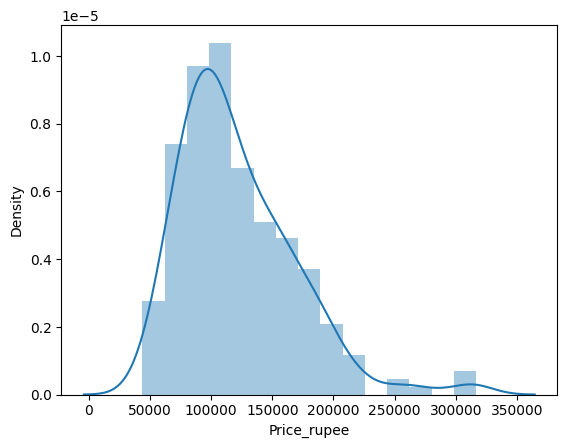

In [15]:
sns.distplot(df['Price_rupee'])

/tmp/ipykernel_18/4141029830.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price_rupee', ylabel='Density'>

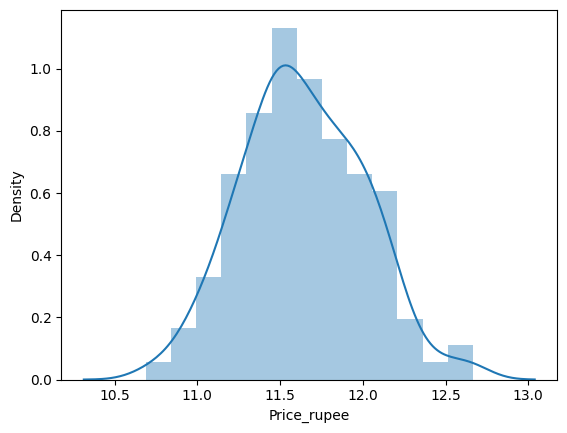

In [16]:
sns.distplot(np.log(df['Price_rupee']))

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Price_rupee', axis=1)
y = np.log(df['Price_rupee'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [18]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression


ct = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['Manufacturer', 'Screen']), remainder='passthrough'
)

lr = LinearRegression()

pipe_lr = make_pipeline(ct, lr)
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Manufacturer',
                                                   'Screen'])])),
                ('linearregression', LinearRegression())])

In [19]:
from sklearn.metrics import r2_score,mean_absolute_error

y_pred_lr = pipe_lr.predict(X_test)
print('R2 score',r2_score(y_test,y_pred_lr))
print('MAE',mean_absolute_error(y_test,y_pred_lr))

R2 score 0.5797411057405495
MAE 0.1702530606967001


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros



In [20]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

scores_lr = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    pipe_lr = make_pipeline(ct, lr)
    pipe_lr.fit(X_train, y_train)
    preds = pipe_lr.predict(X_test)
    scores_lr.append(r2_score(y_test, preds))

In [21]:
print(np.argmax(scores_lr))
print(scores_lr[np.argmax(scores_lr)])

408
0.7641159207359893


## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

scores_dtr = []
dtr = DecisionTreeRegressor()

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    pipe_dtr = make_pipeline(ct, dtr)
    pipe_dtr.fit(X_train, y_train)
    preds = pipe_dtr.predict(X_test)
    scores_dtr.append(r2_score(y_test, preds))

In [23]:
print(np.argmax(scores_dtr))
print(scores_dtr[np.argmax(scores_dtr)])

343
0.8055843749943024


## Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor

scores_rfr = []
rfr = RandomForestRegressor()

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    pipe_rfr = make_pipeline(ct, rfr)
    pipe_rfr.fit(X_train, y_train)
    preds = pipe_rfr.predict(X_test)
    # r2_score(y_test, preds)
    scores_rfr.append(r2_score(y_test, preds))
    
print(np.argmax(scores_rfr))
print(scores_rfr[np.argmax(scores_rfr)])

767
0.8431554221618153


**After testing different models, the Random Forest Regressor giving us good accuracy for laptop prices.**

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(pipe_rfr, file)